In [ ]:
import numpy as np
import torch.optim as optim

In [ ]:
a=np.arange(0,24).reshape(2,3,4)
b=np.arange(0,2)
c=(None,slice(None))*3
a[c].shape,a.shape

In [ ]:
import numpy as np

class Petri_net(object):
    def __init__(self,mat_pre,mat_post,m0):
        self.mat_pre=mat_pre
        self.mat_post=mat_post
        self.mat=self.mat_post-self.mat_pre
        self.m=m0

    def is_tansition(self):
        self.tran=(self.m[:,None]>=self.mat_pre).all(0).nonzero()[0]   
        return  np.where(self.tran.size,True,False)  

    def firing(self,T):
        self.m=self.m+self.mat[:,T]     


mat_pre = np.loadtxt("D:\\petri_learning\\c.pre.txt")
mat_post = np.loadtxt("D:\\petri_learning\\c.post.txt")
m0 = np.loadtxt("D:\\petri_learning\\m0.txt")
petri_net=Petri_net(mat_pre,mat_post,m0)  
print(petri_net.mat) 
print("初始标识：",petri_net.m)
for x in range(10):
    if petri_net.is_tansition():  #判断是否存在可激发变迁
        tran_enable=np.random.choice(petri_net.tran)  #随机选择一个可激发变迁
    else:
        print("\n无可激发变迁！")
        break
    petri_net.firing(tran_enable)    #激发变迁
    print("\n可激发变迁：",petri_net.tran+1)
    print("激发变迁：",tran_enable+1)
    print("当前标识：",petri_net.m)





In [ ]:
import numpy as np

class Petri_net(object):
    def __init__(self,mat_pre,mat_post,m0):
        self.mat_pre=mat_pre
        self.mat_post=mat_post
        self.mat=self.mat_post-self.mat_pre
        self.m=m0

    def is_tansition(self,M):   #获得新节点的可激发变迁 返回可激发变迁是否为空
        self.Te=(M[:,None]>=self.mat_pre).all(0).nonzero()[0]   
        return  np.where(self.Te.size,True,False)    

    def firing(self,T,M):       ##随机选择一变迁激发  
        self.m=M+self.mat[:,T]   
        return self.m

class Graph_E(object):
    def __init__(self,node_name ):
        self.node_name=node_name
        self.edge = {node_name:[]}


    def append_head_node(self,head_node):
        self.edge.update({head_node:[]})

    def append_next_node(self,head_node, node_name):
        
        self.edge[head_node].append(node_name)


    def append_head_node(self,head_node):
        self.edge.update({head_node:[]})

    def append_next_node(self,head_node, node_name):
        
        self.edge[head_node].append(node_name)

class Graph_V(Petri_net):
    def __init__(self,mat_pre,mat_post,m0):
        super().__init__(mat_pre,mat_post,m0)
        self.mat_pre=mat_pre
        self.mat_post=mat_post
        self.mat=self.mat_post-self.mat_pre
        self.m=m0
        self.Vnew={0:m0}
        self.V={0:m0}
        self.num=0
    
    def is_empty_Vnew(self):  ##判断Vnew是否为空
        return np.where(len(self.Vnew),True,False)

    def is_empty_Te(self):    ##判断Te是否为空
        return np.where(len(self.Te),True,False)

    def node_choose(self):    ##从Vnew选择新节点
        #temp=np.random.choice(list(self.Vnew.keys()))
        temp=list(self.Vnew.keys())[0]
        return temp

    def Te_choose(self):    ##从Te选择一个可激发变迁
        ##temp=np.random.choice(self.Te)
        temp=self.Te[0]
        return temp

    def Vnew_delete(self,num): ##从Vnew删除选择节点
        self.Vnew.pop(num)

    def T_delete(self,t):     ##并从Te中删除
        self.Te=[x for x in self.Te if x!=t]
    
    def is_new_node(self,m_new):  ##判断新节点是否在V中出现过
        temp=np.array([list(item) for item in self.V.values()])
        return np.where((temp==m_new[:None]).all(1).nonzero()[0].size,False,True)

    def node_update(self):
        self.num+=1
        self.Vnew.update({self.num:self.m})
        self.V.update({self.num:self.m})


def get_node_num(Dict,m):
    return [k for k, v in Dict.items() if (v == m).all(0)][0]

mat_pre = np.loadtxt("D:\\petri_learning\\c.pre.txt")
mat_post = np.loadtxt("D:\\petri_learning\\c.post.txt")
m0 = np.loadtxt("D:\\petri_learning\\m0.txt")
    

graph_v=Graph_V(mat_pre,mat_post,m0)
graph_e=Graph_E(0)

while(graph_v.is_empty_Vnew()):
    new_node=graph_v.node_choose()       #步骤4  从任意Vnew中选取新节点m
    graph_v.is_tansition(graph_v.V[new_node]) #步骤5  获得m可激发变迁Te
    graph_v.Vnew_delete(new_node)        #       并删除Vnew
    graph_e.append_head_node(new_node)
    while(graph_v.is_empty_Te()):
        tran_enable=graph_v.Te_choose()      #步骤6  从Te中随机选择一个可激发变迁
        graph_v.T_delete(tran_enable)        #       并将该变迁从Te中删除
        graph_v.firing(tran_enable,graph_v.V[new_node])          #步骤7  激发变迁  得到m'
        if graph_v.is_new_node(graph_v.m):        #步骤8  判断m'是不是新出现节点
            graph_v.node_update()            #       是  则更新V_new  V  W E

        print(new_node,tran_enable,get_node_num(graph_v.V,graph_v.m))
        graph_e.append_next_node(new_node,get_node_num(graph_v.V,graph_v.m))
    

graph_e.edge,graph_v.V



In [ ]:


[k for k, v in graph_v.V.items() if (v == graph_v.m).all(0)][0]

In [ ]:
graph_v.m

In [ ]:
modified_array = np.delete(a,(a==b).all(1).nonzero()[0],0)
modified_array

In [2]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def graph_showing(data):
    '''
    args:
         data: torch_geometric.data.Data
    '''
    G = nx.Graph()
    edge_index = data['edge_index'].t()
#     print(edge_index)
    edge_index = np.array(edge_index.cpu())
#     print(edge_index)
    
    G.add_edges_from(edge_index)
    nx.draw(G)
    plt.show()



In [41]:
dataset.data['edge_index'].t()

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        ...,
        [47, 24],
        [47, 29],
        [47, 30]])

In [3]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='./data/ENZYMES', name='ENZYMES')

#for data in dataset:
#    print(data)
#     print(data['edge_index'])
#     print(data.is_directed())
#     print(data.num_edges)
#    graph_showing(data)


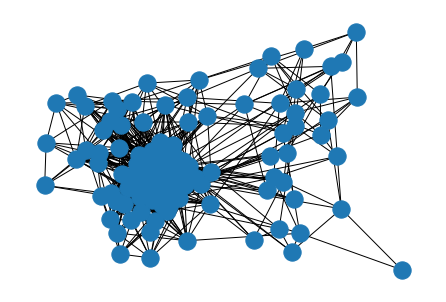

In [34]:

graph_showing(dataset.data)

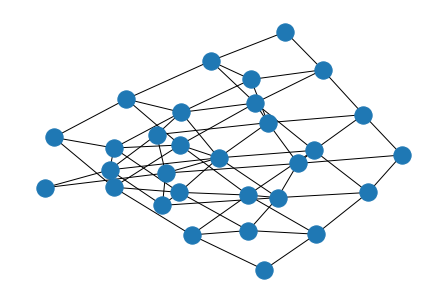

In [52]:

x=torch.arange(1,9,1)
edge_index=[
[0,1],
[1,2],
[1 ,3],
[1 ,4],
[2 ,5],
[2 ,6],
[2 ,7],
[3 ,6],
[3 ,8],
[4 ,7],
[4 ,8],
[5 ,9],
[5 ,10],
[6 ,9],
[6 ,11],
[6 ,12],
[7 ,10],
[7 ,12],
[7 ,13],
[8 ,12],
[8 ,0],
[9 ,14],
[9 ,15],
[10  ,15],
[10  ,16],
[11  ,14],
[11  ,17],
[12  ,15],
[12  ,17],
[12  ,18],
[12  ,1],
[13  ,16],
[13  ,18],
[14  ,19],
[14  ,20],
[15  ,20],
[15  ,21],
[15  ,2],
[16  ,21],
[16 , 22],
[17  ,20],
[17  ,23],
[17  ,3],
[18  ,21],
[18  ,23],
[18  ,4],
[19  ,24],
[20  ,24],
[20  ,25],
[20  ,6],
[21  ,25],
[21  ,26],
[21  ,7],
[22  ,26],
[23  ,25],
[23  ,8],
[24  ,27],
[24  ,11],
[25  ,27],
[25  ,28],
[25  ,12],
[26  ,28],
[26 ,13],
[27,29],
[27,17],
[28,29],
[28,18],
[29,23]]
edge_index = np.array(edge_index)
G = nx.Graph()
G.add_edges_from(edge_index)
nx.draw(G)
plt.show()
